In [1]:
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, mean_absolute_error
import seaborn as sns

In [3]:

mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [5]:
x, y = mnist['data'], mnist['target']

In [6]:
x = np.array(x)
y = np.array(y)

In [7]:

x.shape

(70000, 784)

In [8]:
y = y.astype('int')

In [9]:
x_train, x_test = x[:60000], x[60000:70000]
y_train, y_test = y[:60000], y[60000:70000]

In [10]:

x_train.shape

(60000, 784)

In [11]:
x_test.shape

(10000, 784)

In [12]:
y_train.shape

(60000,)

In [13]:
y_test.shape

(10000,)

# **Data visualisation**

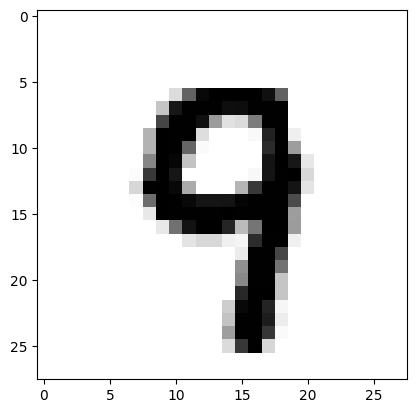

In [14]:
some_image = x[520]
some_image = some_image.reshape(28,28)
plt.imshow(some_image, cmap=matplotlib.cm.binary,interpolation='nearest')


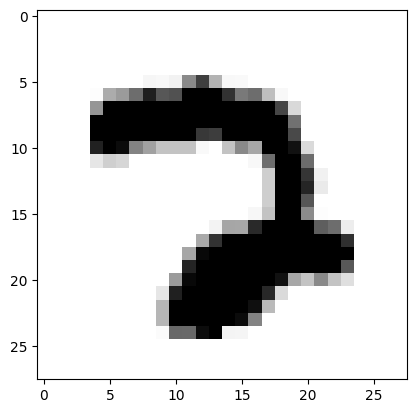

In [15]:
some_image = x[120]
some_image = some_image.reshape(28,28)
plt.imshow(some_image, cmap=matplotlib.cm.binary,interpolation='nearest')

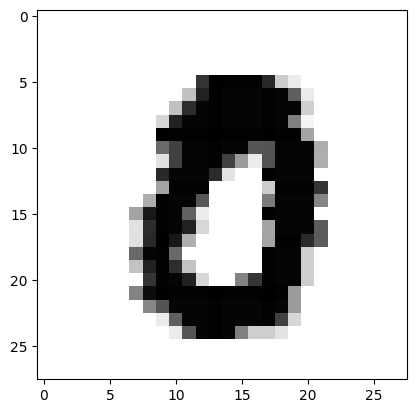

In [16]:

some_image = x[69]
some_image = some_image.reshape(28,28)
plt.imshow(some_image, cmap=matplotlib.cm.binary,interpolation='nearest')

# **Applying DecisionTreeRegressor as base model**
#Assumption depth size 1

In [17]:
lr = 0.1   #learning rate

In [18]:
dt = DecisionTreeRegressor(max_depth = 1)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=1)

In [19]:

y_pred = dt.predict(x_test)

In [20]:
y_pred[:10]

array([5.36713732, 2.6254691 , 2.6254691 , 2.6254691 , 5.36713732,
       2.6254691 , 5.36713732, 5.36713732, 2.6254691 , 5.36713732])

In [21]:
mae = mean_absolute_error(y_test,  y_pred)
mae

2.2267110373114707

In [22]:
score = r2_score(y_test, y_pred)
score

0.22100481734722877

In [23]:
y_pred = np.round(y_pred)

In [24]:
print(accuracy_score( y_test, y_pred))    # accuracy

0.0716


# **Iteration 1**

In [25]:
y_it1 = dt.predict(x_train)
y_it1 = np.round(y_it1)

In [26]:
y_train1 = y_train - y_it1

In [27]:
dt1 = DecisionTreeRegressor(max_depth = 1)
dt1.fit(x_train,  y_train1)


DecisionTreeRegressor(max_depth=1)

In [28]:
y_pred1 = dt1.predict(x_test)
y_pred1 = np.round(y_pred1)
print(accuracy_score( y_test, y_pred + y_pred1 ))    # accuracy

0.1238



# **Iteration 2**

In [29]:
y_it2 = dt1.predict(x_train)
y_it2 = np.round(y_it2)

In [30]:
y_train2 = y_train1 - y_it2

In [31]:
dt2 = DecisionTreeRegressor(max_depth = 1)
dt2.fit(x_train,  y_train2)

DecisionTreeRegressor(max_depth=1)

In [32]:
y_pred2 = dt2.predict(x_test)
y_pred2 = np.round(y_pred2)
print(accuracy_score( y_test, y_pred + y_pred1 + y_pred2 ))    # accuracy 2


0.1371
